In [1]:
from glob import glob
import pandas as pd
import numpy as np
import re
import time
import requests
import numpy as np
import pandas as pd
from itertools import chain
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from gensim.models import word2vec
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
#nltk.download('popular', halt_on_error=False)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
#textblob
from textblob import TextBlob, Word
from sklearn.metrics import silhouette_score
from nltk.corpus import wordnet
# Import Counter
from collections import Counter
import string
from langdetect import detect
from nltk.corpus import words as eng_words
from nltk.corpus import words as eng_words
from sklearn.decomposition import NMF, LatentDirichletAllocation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from statsmodels.discrete.discrete_model import Logit 
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from  sklearn.metrics import recall_score
from scipy import stats
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  roc_curve
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  roc_curve,accuracy_score
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier

In [11]:
full=pd.read_csv("Cleaned.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
full.columns

Index(['Unnamed: 0', '# of Bubbles', '# of Obj in Category', '# of Photos',
       '# of Reviewer's Positive Reviews', '# of Reviewer's Reviews',
       '# of Reviews', 'Avg Review Score', 'BUB', 'Bubble Dsitibution',
       'DestID', 'DestType', 'ID', 'Language Distribution', 'Link', 'Location',
       'Location 2', 'Obj Address', 'Obj Certificate', 'Obj Details',
       'Obj Rank', 'Object Features Bubbles', 'Phone number',
       'Ranking Category', 'RevID', 'Review Category', 'Review Content',
       'Review Date', 'Review Title', 'Review via', 'Reviewer Location',
       'Reviewer Name', 'Room Tip', 'Trip Type', 'Visit Date', 'cleaned',
       'corrected', 'languages'],
      dtype='object')

In [4]:
full = full[pd.notnull(full['Review Content'])]
full["# of Bubbles"]=pd.to_numeric(full["# of Bubbles"], errors='coerce')
full["# of Bubbles"].value_counts()

5.0    21356
4.0    13071
3.0     2254
1.0      922
2.0      853
Name: # of Bubbles, dtype: int64

In [5]:
full.columns

Index(['Unnamed: 0', '# of Bubbles', '# of Obj in Category', '# of Photos',
       '# of Reviewer's Positive Reviews', '# of Reviewer's Reviews',
       '# of Reviews', 'Avg Review Score', 'BUB', 'Bubble Dsitibution',
       'DestID', 'DestType', 'ID', 'Language Distribution', 'Link', 'Location',
       'Location 2', 'Obj Address', 'Obj Certificate', 'Obj Details',
       'Obj Rank', 'Object Features Bubbles', 'Phone number',
       'Ranking Category', 'RevID', 'Review Category', 'Review Content',
       'Review Date', 'Review Title', 'Review via', 'Reviewer Location',
       'Reviewer Name', 'Room Tip', 'Trip Type', 'Visit Date', 'cleaned',
       'corrected', 'languages'],
      dtype='object')

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import numpy as np

def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print (documents[doc_index])

#dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))




In [12]:
documents = full["cleaned"]

In [13]:
no_features = 10000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features,stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()


no_topics = 40

# Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_


no_top_words = 20
no_top_documents = 10
display_topics(nmf_H, nmf_W, tfidf_feature_names, documents, no_top_words, no_top_documents)

Topic 0:
try order menu dish burger salad come waiter eat table make soup chicken meat serve taste beer pizza ask bread
saw place week ago decide try tonight table narrow terrace outside inside square area 8 tables.i get menu quickly wait order take eventually able order mushroom czech dish meat dumpling sauce waitress keep recommend greek salad wonder cheese olive best date beer come quickly good nice starter main arrive time mushroom big good dish mostly four slice dumpling make press bread sauce taste ok nothing special finish beer nobody offer another wait could order another one overall good beer food mix quite good maybe dish better service need bite attentive bad
normal choice beer find place yerevan eve numerous time every time eve order food get wrong still charge food n't order mm fluent armenian n't matter miscommunication first time go ask burger fry get plate fry ask burger say ready give ask eat burger n't get plate waitress say accuse steal point ask check leave today fr

cozy place dinner lover enjoy tastiest armenian food ever friendly staff good service enjoy enjoy enjoy recommend
best place yerevan find special armenian dish enjoy time really enjoy
friend like food tasty enjoy really fantastic place enjoy time
great food great service ca n't wait go back enjoy restaurant great atmosphere.my child enjoy u adult enjoy well
good place enjoy traditional food enjoy taste armenian bread meat delicious food around
beautiful place visit friend enjoy good music good time fell free enjoy
go parent really enjoy food atmosphere good value money enjoy experience
go weekend enjoy garden near cafe great music menu staff enjoy night yerevan
really enjoy meal experience staff know well english food healthy delicious enjoy nice atmosphere restaurant overall recommend place
food amaze service good welcome enjoy sit outside fresher air enjoy
Topic 37:
beautiful nature surround interior fountain architecture light build garden night design set view mountain temple lovel

In [70]:
labels2=[]
for i in nmf_W:
    maxim=max(i)
    result = np.where(i == maxim)
    labels2.append(result[0][0])
#full["clusters"]=labels2
#full.clusters.value_counts()
def func(x):
    if x  in [0,7]:
        x="FAST_FOOD"
    elif x ==1:
        x="Hotel"
    elif x ==2:
        x="Sightseeings"
    elif x in [3,31]:
        x="TOUR_OR_GUIDE"
    elif x in [4,6,39,21]:
        x="SERVICE"
    elif x in  [5,27,18]:
        x="Describing_Places"
    elif x ==8:
        x="Republic_Square"
    elif x in [9,28]:
        x="cozy_places"
    elif x ==10:
        x="Hostel"
    elif x==11:
        x="Armenians"
    elif x ==12:
        x="staff"
    elif x==13:
        x="museums"
    elif x==14:
        x="culture"
    elif x==15:
        x="wine"
    elif x==16:
        x="cascade_centre"
    elif x in [17,30,37,38]:
        x="Recommend_Armenia"
    elif x == 19:
        x="Places_to_eat"
    elif x in [20,26]:
        x="Fresh_Food"
    elif x ==22:
        x="Yerevan_Drive"
    elif x==23:
        x="Loyal_Visitors"
    elif x==24:
        x="Restaurants"
    elif x in [25,36]:
        x="Pleasure"
    elif x==29:
        x="Cofee_Tea"
    elif x==32:
        x="City_Center"
    elif x==33:
        x="Good_price_High_quality"
    elif x==34:
        x="Family_Place"
    elif x==35:
        x="Music_clubs"
    return x
        
    
    
    
   



In [71]:
labels=list(map(func,labels2))

In [72]:
labels

['Restaurants',
 'Good_price_High_quality',
 'SERVICE',
 'FAST_FOOD',
 'SERVICE',
 'SERVICE',
 'SERVICE',
 'SERVICE',
 'Restaurants',
 'Loyal_Visitors',
 'Recommend_Armenia',
 'Loyal_Visitors',
 'Loyal_Visitors',
 'Family_Place',
 'culture',
 'cozy_places',
 'Family_Place',
 'Pleasure',
 'FAST_FOOD',
 'Fresh_Food',
 'cozy_places',
 'FAST_FOOD',
 'Loyal_Visitors',
 'Good_price_High_quality',
 'Fresh_Food',
 'SERVICE',
 'Fresh_Food',
 'Describing_Places',
 'cozy_places',
 'culture',
 'Recommend_Armenia',
 'cozy_places',
 'Pleasure',
 'Recommend_Armenia',
 'Describing_Places',
 'City_Center',
 'SERVICE',
 'Fresh_Food',
 'cozy_places',
 'City_Center',
 'Cofee_Tea',
 'SERVICE',
 'Cofee_Tea',
 'cozy_places',
 'FAST_FOOD',
 'Fresh_Food',
 'Good_price_High_quality',
 'FAST_FOOD',
 'FAST_FOOD',
 'FAST_FOOD',
 'culture',
 'Pleasure',
 'Fresh_Food',
 'wine',
 'SERVICE',
 'Restaurants',
 'Fresh_Food',
 'FAST_FOOD',
 'Fresh_Food',
 'FAST_FOOD',
 'Describing_Places',
 'cozy_places',
 'Restaurants',


In [14]:
full["clusters"]=labels

In [54]:
full.to_csv("final_Arman.csv",index_label=False)

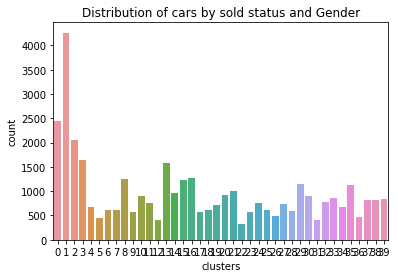

1     11.079907
0      6.334347
2      5.322828
3      4.264503
13     4.103284
16     3.294589
8      3.278987
15     3.206178
29     2.982552
35     2.940947
21     2.631511
14     2.504095
20     2.381881
30     2.363679
10     2.361079
33     2.259667
39     2.186858
38     2.153054
37     2.124451
32     2.015238
11     1.973633
24     1.973633
27     1.903425
19     1.835817
34     1.744806
4      1.742206
6      1.617391
25     1.606990
18     1.583587
7      1.578386
28     1.560184
23     1.492576
9      1.482175
17     1.469173
26     1.294953
36     1.219544
5      1.164937
12     1.073927
31     1.042723
22     0.850300
Name: clusters, dtype: float64


In [16]:
sns.countplot(x="clusters",data=full)
plt.title("Distribution of cars by sold status and Gender")
plt.show()
#let's see percenatage of customers who didn't subscribe to term deposit,
#and percenatage of customers who subscribed to term deposit
print(full.clusters.value_counts()/len(full)*100)

#### <p1>as we see our benchmark is about 84 percent our model should predict more precisely</p1>


In [15]:
full.clusters=full.clusters.astype('category')
Y1=full.clusters.cat.codes

In [18]:
dct=dict(zip(full.clusters.cat.codes, full.clusters))
dct

{15: 'Restaurants',
 7: 'Good_price_High_quality',
 16: 'SERVICE',
 4: 'FAST_FOOD',
 10: 'Loyal_Visitors',
 14: 'Recommend_Armenia',
 5: 'Family_Place',
 22: 'culture',
 21: 'cozy_places',
 13: 'Pleasure',
 6: 'Fresh_Food',
 3: 'Describing_Places',
 1: 'City_Center',
 2: 'Cofee_Tea',
 26: 'wine',
 18: 'TOUR_OR_GUIDE',
 12: 'Places_to_eat',
 25: 'staff',
 11: 'Music_clubs',
 20: 'cascade_centre',
 19: 'Yerevan_Drive',
 0: 'Armenians',
 23: 'hraparak',
 17: 'Sightseeings',
 8: 'Hostel',
 9: 'Hotel',
 24: 'museums'}

In [19]:
Y1=full.clusters
X1=tfidf.toarray()
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42,stratify=Y1)

In [23]:
log=LogisticRegression(solver='saga',random_state=42,class_weight="balanced",multi_class='multinomial')

In [24]:
log.fit(x_train,y_train)

C:\Users\Vazgen\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=42, solver='saga', tol=0.0001, verbose=0,
          warm_start=False)

In [4]:
from joblib import dump, load
#dump(log, 'text.joblib') 
clf = load('text.joblib') 

In [26]:
train_score=log.score(x_train,y_train)
test_score=log.score(x_test,y_test)

print("Train score is %s and Test score is%s"%(train_score,test_score))
#print("cross_validation score is %s"% (np.mean(cross_val_score(LogisticRegression(random_state=42,C=C,penalty=Penalty,class_weight='balanced',solver='liblinear'),X1,Y1,cv=5))))
y_pred=log.predict(x_test)
y_pred2=log.predict(x_train)
print(classification_report(y_test,log.predict(x_test)))
#print("roc_auc: for test is",roc_auc_score(y_test,y_pred))
#print("roc_auc: for train is",roc_auc_score(y_train,y_pred2))
#print("average Roc_score is",log.best_score_)
#print("recall for train",recall_score(y_train,y_pred2))
#print("recall for test",recall_score(y_test,y_pred))
print("Overall Accuracy score is ",accuracy_score(y_test,y_pred))

Train score is 0.8943279700958882 and Test score is0.8066822672906916
                         precision    recall  f1-score   support

              Armenians       0.71      0.97      0.82       152
            City_Center       0.74      0.94      0.83       155
              Cofee_Tea       0.86      0.93      0.90       229
      Describing_Places       0.70      0.63      0.67       358
              FAST_FOOD       0.84      0.74      0.79       609
           Family_Place       0.71      0.90      0.79       134
             Fresh_Food       0.71      0.72      0.71       283
Good_price_High_quality       0.75      0.95      0.84       174
                 Hostel       0.91      0.88      0.90       182
                  Hotel       0.91      0.92      0.92       852
         Loyal_Visitors       0.68      0.89      0.77       115
            Music_clubs       0.80      0.91      0.85       226
          Places_to_eat       0.72      0.87      0.78       141
               Plea

In [16]:
from joblib import dump, load
#dump(log, 'text.joblib') 
clf = load('text.joblib') 

In [18]:
def parse(s):
    s = s.replace("0","o").replace("3","e").replace("cant",r"can't").replace("wheres",r"where's").replace(" i "," I ")
    return str(s[0].upper()) + s[1:]
def clean_text(text):
    try:
    #TextBlos is object which helps to get words and lemmatize them,remove punctuaions and singularize words
   
        text=TextBlob(parse(text))
        spell = SpellChecker()
        words=text.words
        sw = stopwords.words('english')
        corrected=[spell.correction(i)  if i.islower() else i for i in words]
        new = [i.lower() for i in corrected if i.lower() not in sw and i in eng_words.words() ]
        cleaned=TextBlob(" ".join(new))
        a=[]
        ## here I will loop twice to lemmatize both verbs and nouns
        for i in cleaned.words:
            a.append(i.lemmatize("v"))
        c=TextBlob(" ".join(a)).words
        d=[]
        for i in c:
            d.append(i.lemmatize("n"))
        return " ".join(d)
    except:
        return str(text) 

In [19]:
def predict_topic(string):
    string=clean_text(string)
    string=clean_text(string)
    string=[string]
    new_features = tfidf_vectorizer.transform(string)
    result=clf.predict(new_features.toarray())[0]
    print("Review's topic is ",result)
    return result
    

In [20]:
predict_topic("")

Review's topic is  Yerevan_Drive


'Yerevan_Drive'